In [1]:
!pip install pytube

     |████████████████████████████████| 56 kB 3.2 MB/s 


In [2]:
import pandas as pd
import os
import sys
from pytube import YouTube, Stream, StreamQuery, Playlist

In [3]:
path = input('path:')
yt = YouTube(input('URL:'))
yt.streams.get_highest_resolution().download(path)

path:
URL:https://youtu.be/PHrN7yp1AJw


RegexMatchError: ignored

# AQI Data Pipeline

In [ ]:
import pandas as pd
import numpy as np
import requests                 # to get the webpage
from bs4 import BeautifulSoup   # to parse the webpage
import json                     # to convert API to json format
from urllib.parse import urlencode
from google.colab import files



# Loading the datasets

In [ ]:
hourly_data = files.upload()

Saving stations_hourlydata.csv to stations_hourlydata.csv


In [ ]:
station_data = files.upload()

# Pre-processing

In [ ]:
df_h = pd.read_csv("stations_hourlydata.csv")
df_h.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,DL001,2018-11-11 15:00:00,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,3.40,15.30,0.10,NaN,NaN
1,DL001,2018-11-11 16:00:00,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,3.68,15.08,0.10,NaN,NaN
2,DL001,2018-11-11 17:00:00,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,3.33,12.27,0.10,NaN,NaN
3,DL001,2018-11-11 18:00:00,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,3.85,13.33,0.15,NaN,NaN
4,DL001,2018-11-11 19:00:00,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,6.80,19.02,0.30,NaN,NaN


In [ ]:
df_h.isnull().sum() #shows the number of missing values

StationId          0
Datetime           0
PM2.5         248004
PM10          349161
NO            222378
NO2           218438
NOx           183814
NH3           458786
CO            233098
SO2           391660
O3            263269
Benzene       356799
Toluene       395727
Xylene        972794
AQI           241288
AQI_Bucket    241288
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train_set, test_set = train_test_split(df_h, test_size=0.2, random_state=42)

In [ ]:
new_frame = df_h.drop(["StationId","Datetime","AQI_Bucket"], axis = 1)
#labels = train_set["AQI_Bucket"].copy()

In [ ]:
new_frame.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,3.40,15.30,0.10,NaN
1,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,3.68,15.08,0.10,NaN
2,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,3.33,12.27,0.10,NaN
3,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,3.85,13.33,0.15,NaN
4,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,6.80,19.02,0.30,NaN


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") #using median to replace the nulls

In [ ]:
x = imputer.fit(new_frame)

In [ ]:
tr = imputer.transform(new_frame)

In [ ]:
tr_df = pd.DataFrame(tr, columns = new_frame.columns) #the new transformed dataframe

In [ ]:
tr_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,130.00,274.00,1.70,54.00,30.10,39.194908,0.80,26.40,43.560997,3.40,15.30,0.10,238.928784
1,133.25,279.00,1.70,55.07,30.67,25.550000,0.83,27.97,43.560997,3.68,15.08,0.10,238.928784
2,140.25,284.25,1.58,55.88,30.97,24.300000,0.85,24.80,105.230000,3.33,12.27,0.10,238.928784
3,153.25,332.00,1.63,64.05,35.40,28.570000,1.53,20.25,83.530000,3.85,13.33,0.15,238.928784
4,247.00,575.00,1.75,80.07,43.98,37.900000,1.68,18.00,53.570000,6.80,19.02,0.30,238.928784


In [ ]:
tr_df.isnull().sum() #no more nulls

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

# Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
corr_matrix = tr_df.corr()

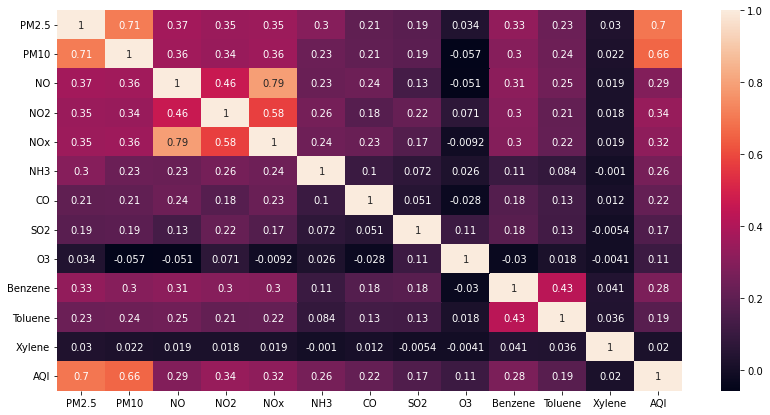

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

# Regression Model

In [ ]:
train_set, test_set = train_test_split(tr_df, test_size=0.2, random_state=42)

In [ ]:
features = train_set.drop("AQI", axis=1)
labels = train_set["AQI"].copy()

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(features, labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:

AQI_predictions = lin_reg.predict(features)
mean_squared_error(labels, AQI_predictions)

6032.809187461957